<a href="https://colab.research.google.com/github/dhaffadevara21/E-Commerce-Customer-Segmentation/blob/main/Final_Project_Data_Analyst_DS33B_Alief_Dhaffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('E-commerce Customer Behavior.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## Data Understading

In [ ]:
#struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
# Dimensi data
print("\nJumlah baris dan kolom:", df.shape)


Jumlah baris dan kolom: (350, 11)


In [ ]:
# Statistik untuk numerik
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


*   Tidak terdapat outlier dengan meilhat perbandingan antara mean dan median
*   Data tersebar dengan baik, dapat dilihat pada standar deviasi
*   Tidak terdapat duplikat, dapat dilihat pada customer id, jumlah uniquenya ada 891 (sesuai total data) #coba cek lagi

In [ ]:
# Statistik untuk semua kolom (termasuk kategorikal)
df.describe(include='all')

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
count,350.000000,350,350.000000,350,350,350.000000,350.000000,350.000000,350,350.000000,348
unique,NaN,2,NaN,6,3,NaN,NaN,NaN,2,NaN,3
top,NaN,Female,NaN,New York,Gold,NaN,NaN,NaN,True,NaN,Satisfied
freq,NaN,175,NaN,59,117,NaN,NaN,NaN,175,NaN,125
mean,275.500000,NaN,33.597143,NaN,NaN,845.381714,12.600000,4.019143,NaN,26.588571,NaN
std,101.180532,NaN,4.870882,NaN,NaN,362.058695,4.155984,0.580539,NaN,13.440813,NaN
min,101.000000,NaN,26.000000,NaN,NaN,410.800000,7.000000,3.000000,NaN,9.000000,NaN
25%,188.250000,NaN,30.000000,NaN,NaN,502.000000,9.000000,3.500000,NaN,15.000000,NaN
50%,275.500000,NaN,32.500000,NaN,NaN,775.200000,12.000000,4.100000,NaN,23.000000,NaN
75%,362.750000,NaN,37.000000,NaN,NaN,1160.600000,15.000000,4.500000,NaN,38.000000,NaN


In [ ]:
# Tipe data setiap kolom
df.dtypes

,0
Customer ID,int64
Gender,object
Age,int64
City,object
Membership Type,object
Total Spend,float64
Items Purchased,int64
Average Rating,float64
Discount Applied,bool
Days Since Last Purchase,int64


## Data Cleaning

**Cek Duplicate**

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
345,False
346,False
347,False
348,False


hasilnya 0, berarti aman (tidak ada yg terduplicate)

In [ ]:
#cek berapa row yang duplicate
#.sum() untuk melihat langsung ada berapa row yang terduplicate

df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(350, 11)

**Cek Missing Values**

In [ ]:
# pendekatan isna
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


Terdapat 1 kolom yg memiliki missing values (Satisfaction Level)

In [ ]:
##periksa jumlah null untuk masing2 kolom dengan persen

df.isnull(). sum() / len(df) *100

,0
Customer ID,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Membership Type,0.000000
Total Spend,0.000000
Items Purchased,0.000000
Average Rating,0.000000
Discount Applied,0.000000
Days Since Last Purchase,0.000000


Karena hanya 0,5 % maka akan diisi dengan modus

In [ ]:
# Mengisi missing value pada kolom 'Satisfaction Level' dengan modus
mode_value = df['Satisfaction Level'].mode()[0]  # Ambil modus
df['Satisfaction Level'].fillna(mode_value, inplace=True)

# Verifikasi hasil
print("Jumlah missing value setelah diisi:")
print(df['Satisfaction Level'].isnull().sum())


Jumlah missing value setelah diisi:
0


/tmp/ipython-input-13-823683654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna(mode_value, inplace=True)


In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


Sudah tidak ada lagi missing values

## Data Manipulation

a. Kategori Usia

In [ ]:
# Membuat kolom Age Group
bins = [0, 25, 35, 45, 100]
labels = ['<25', '25-35', '36-45', '>45']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Menampilkan distribusi Age Group
print(df['Age Group'].value_counts())

Age Group
25-35    234
36-45    116
<25        0
>45        0
Name: count, dtype: int64


Rata-rata Pengeluaran per Item

In [ ]:
# Membuat kolom Average Spend per Item
df['Average Spend per Item'] = df['Total Spend'] / df['Items Purchased']

# Menampilkan beberapa baris
print(df[['Total Spend', 'Items Purchased', 'Average Spend per Item']].head())

   Total Spend  Items Purchased  Average Spend per Item
0      1120.20               14               80.014286
1       780.50               11               70.954545
2       510.75                9               56.750000
3      1480.30               19               77.910526
4       720.40               13               55.415385


Kategori Frekuensi Pembelian

In [ ]:
# Membuat kolom Purchase Frequency
bins = [0, 15, 30, 60, float('inf')]
labels = ['Very Active', 'Active', 'Inactive', 'Churn Risk']
df['Purchase Frequency'] = pd.cut(df['Days Since Last Purchase'], bins=bins, labels=labels, include_lowest=True)

# Menampilkan distribusi Purchase Frequency
print(df['Purchase Frequency'].value_counts())

Purchase Frequency
Active         133
Inactive       121
Very Active     93
Churn Risk       3
Name: count, dtype: int64


## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribusi

a. Distribusi Kepuasan Pelanggan

/tmp/ipython-input-43-2639296533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction Level', data=df, palette=custom_palette)


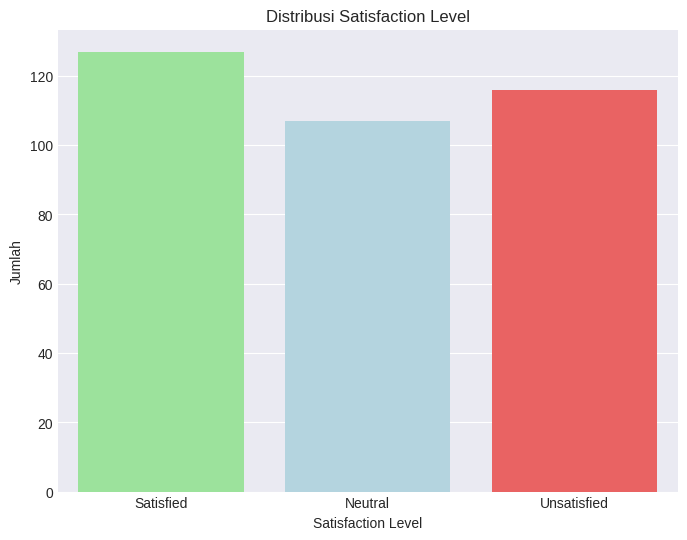

In [ ]:
# Palet warna khusus
custom_palette = {
    'Satisfied': '#90ee90',    # hijau muda
    'Neutral': '#add8e6',      # biru muda
    'Unsatisfied': '#ff4d4d'   # merah terang
}

plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction Level', data=df, palette=custom_palette)
plt.title('Distribusi Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Jumlah')
plt.show()

b. Distribusi Total Spend dan Items Purchased

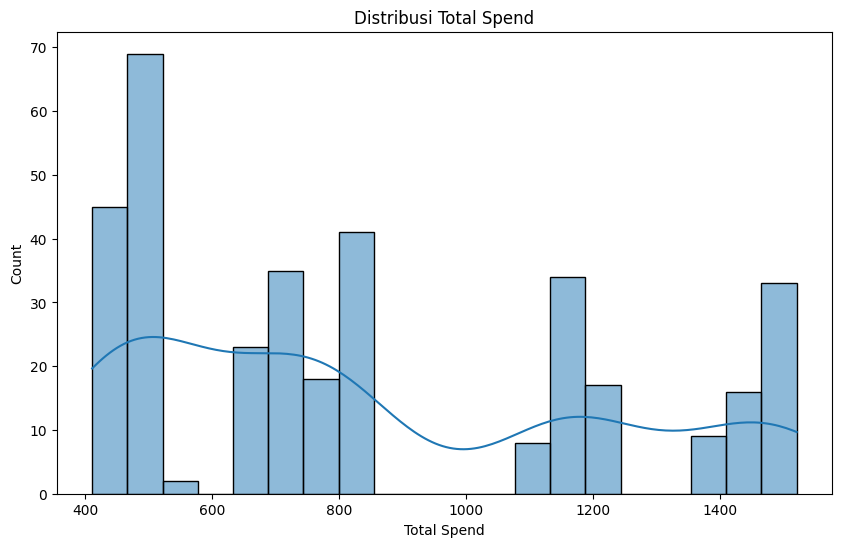

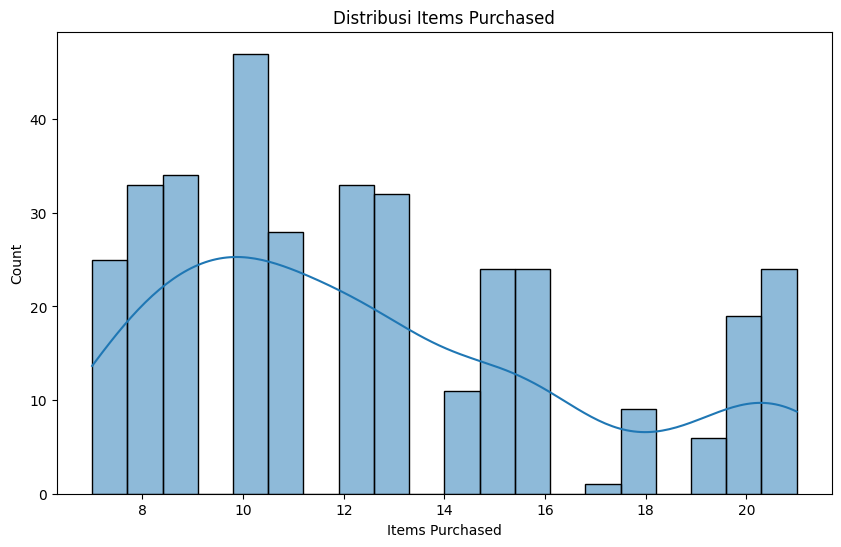

In [ ]:
# Histogram untuk Total Spend
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spend'], bins=20, kde=True)
plt.title('Distribusi Total Spend')
plt.show()

# Histogram untuk Items Purchased
plt.figure(figsize=(10, 6))
sns.histplot(df['Items Purchased'], bins=20, kde=True)
plt.title('Distribusi Items Purchased')
plt.show()

### Analisis Hubungan Antar Variabel

a. Hubungan antara Membership Type dan Satisfaction Level

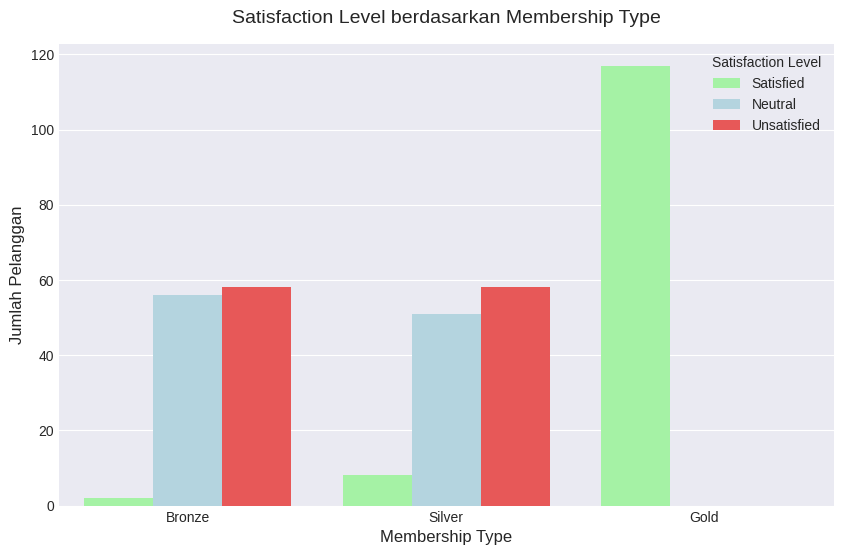

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette(["#98ff98", "#add8e6", "#ff4040"])

# Visualisasi Satisfaction Level berdasarkan Membership Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Membership Type', hue='Satisfaction Level', data=df, order=['Bronze', 'Silver', 'Gold'])
plt.title('Satisfaction Level berdasarkan Membership Type', fontsize=14, pad=15)
plt.xlabel('Membership Type', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Satisfaction Level', labels=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.savefig('satisfaction_by_membership_type.png', dpi=300, bbox_inches='tight')
plt.show()

b. Hubungan antara Total Spend dan Satisfaction Level

/tmp/ipython-input-42-2182785765.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction Level', y='Total Spend', data=df, order=['Satisfied', 'Neutral', 'Unsatisfied'],


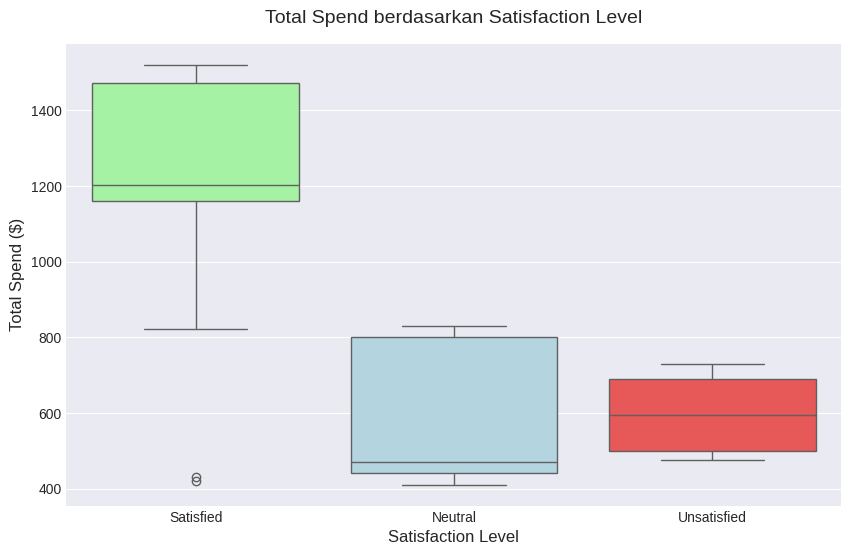

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

# Mengatur palet warna khusus
colors = {"Satisfied": "#98ff98", "Neutral": "#add8e6", "Unsatisfied": "#ff4040"}

# Visualisasi boxplot Total Spend berdasarkan Satisfaction Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction Level', y='Total Spend', data=df, order=['Satisfied', 'Neutral', 'Unsatisfied'],
            palette=colors)
plt.title('Total Spend berdasarkan Satisfaction Level', fontsize=14, pad=15)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('total_spend_by_satisfaction_colored.png', dpi=300, bbox_inches='tight')
plt.show()

c. Matriks Korelasi

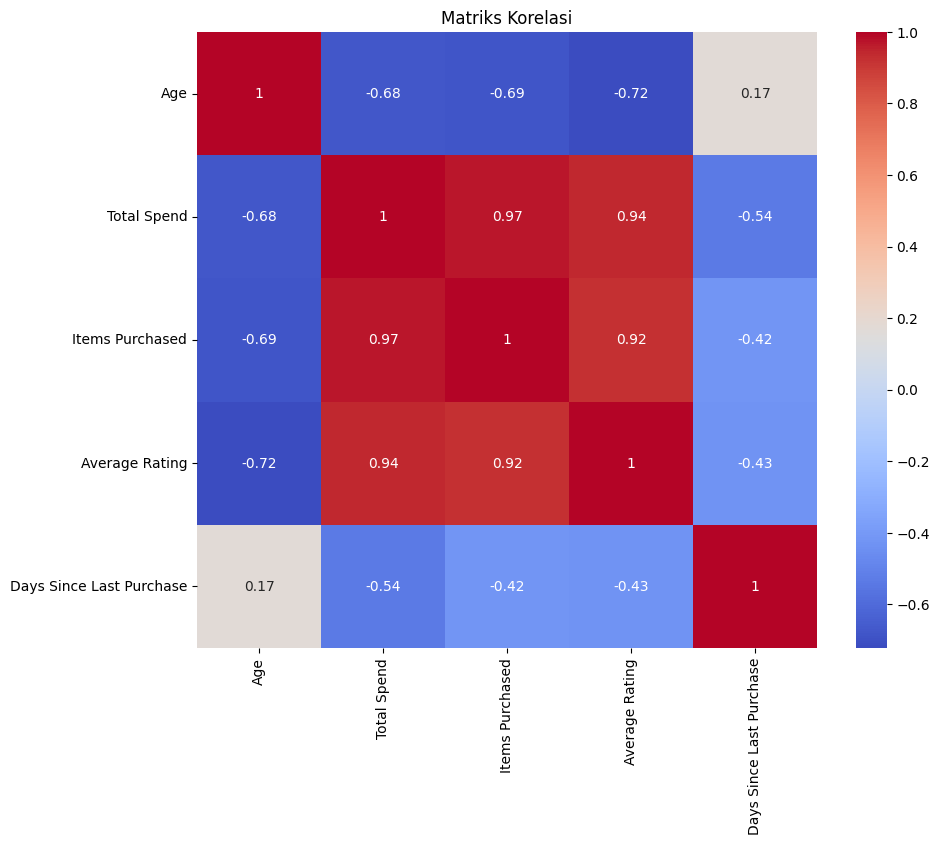

In [ ]:
# Memilih kolom numerik
numeric_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

### Analisis Berdasarkan Demografi

a. Kepuasan berdasarkan Gender

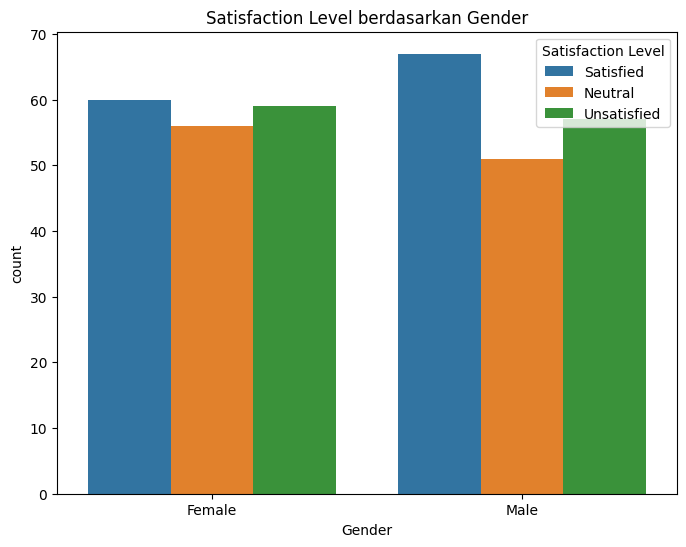

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level berdasarkan Gender')
plt.show()

b. Kepuasan berdasarkan Kota

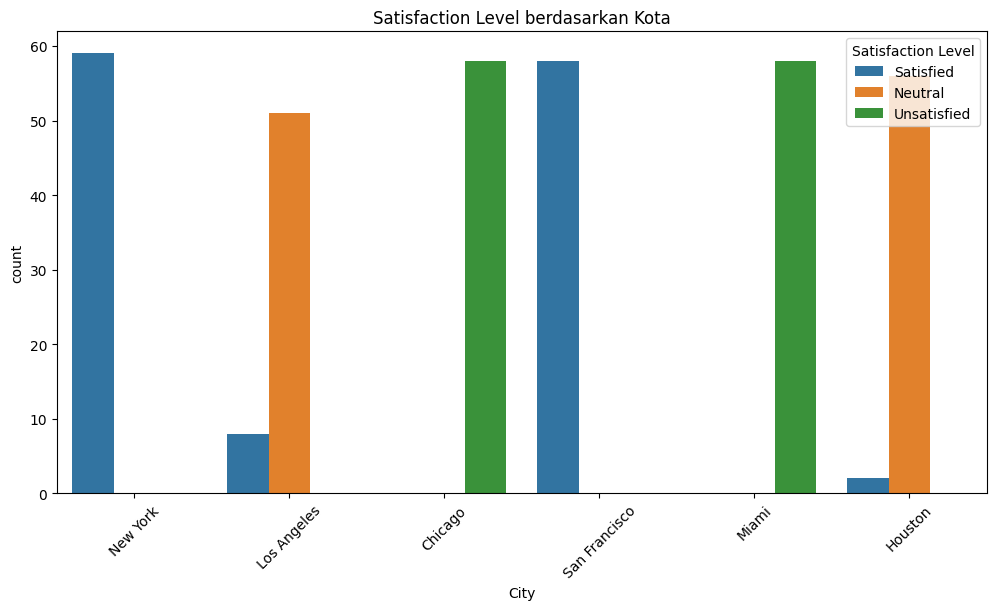

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level berdasarkan Kota')
plt.xticks(rotation=45)
plt.show()

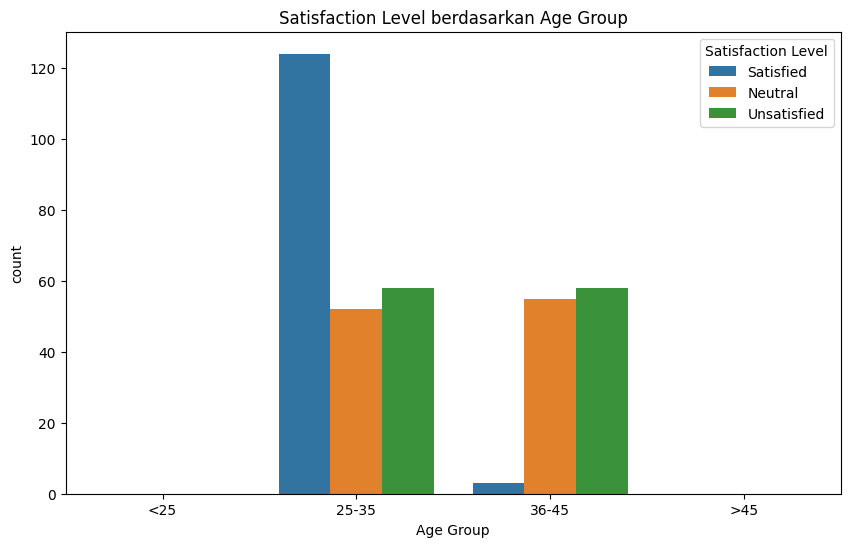

In [ ]:
# Satisfaction Level berdasarkan Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level berdasarkan Age Group')
plt.show()

### Analisis Pengaruh Diskon

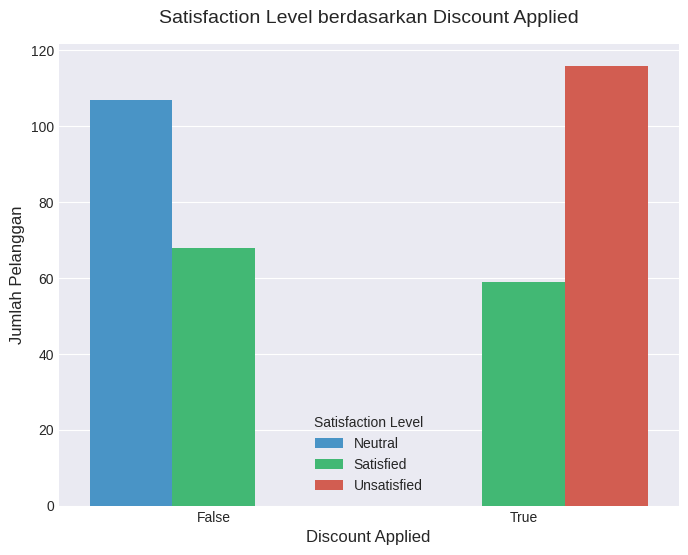

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
colors = {"Satisfied": "#2ecc71", "Neutral": "#3498db", "Unsatisfied": "#e74c3c"}

# Visualisasi distribusi Satisfaction Level berdasarkan Discount Applied
plt.figure(figsize=(8, 6))
sns.countplot(x='Discount Applied', hue='Satisfaction Level', data=df, palette=colors)
plt.title('Satisfaction Level berdasarkan Discount Applied', fontsize=14, pad=15)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Satisfaction Level')
plt.savefig('satisfaction_by_discount_labeled.png', dpi=300, bbox_inches='tight')
plt.show()

### Analisis Waktu Sejak Pembelian Terakhir

/tmp/ipython-input-55-2757341073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction Level', y='Days Since Last Purchase', data=df,


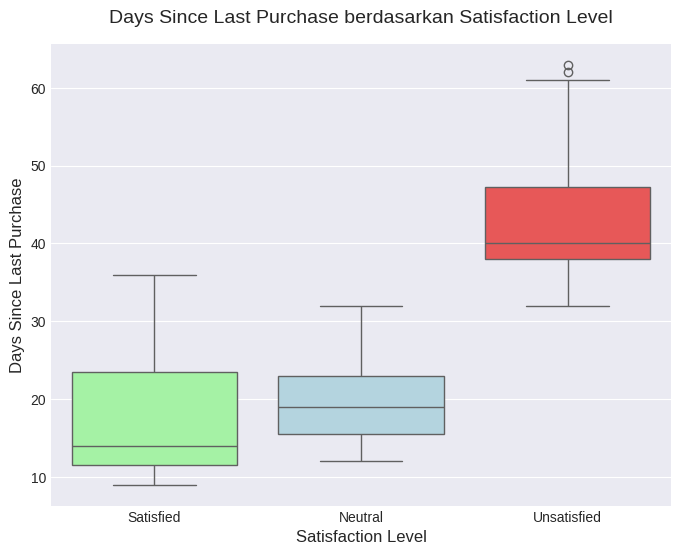

Statistik Days Since Last Purchase berdasarkan Satisfaction Level:
                    count       mean       std   min   25%   50%    75%   max
Satisfaction Level                                                           
Neutral             107.0  19.289720  4.750391  12.0  15.5  19.0  23.00  32.0
Satisfied           127.0  17.763780  7.311067   9.0  11.5  14.0  23.50  36.0
Unsatisfied         116.0  42.982759  7.887230  32.0  38.0  40.0  47.25  63.0


In [ ]:
# Visualisasi boxplot Days Since Last Purchase berdasarkan Satisfaction Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction Level', y='Days Since Last Purchase', data=df,
            palette={'Satisfied': '#98ff98', 'Neutral': '#add8e6', 'Unsatisfied': '#ff4040'},
            order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Days Since Last Purchase berdasarkan Satisfaction Level', fontsize=14, pad=15)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Days Since Last Purchase', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('days_since_last_purchase_by_satisfaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistik deskriptif
print("Statistik Days Since Last Purchase berdasarkan Satisfaction Level:")
print(df.groupby('Satisfaction Level')['Days Since Last Purchase'].describe())

/tmp/ipython-input-47-2453318802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total Spend', data=df, palette='muted')


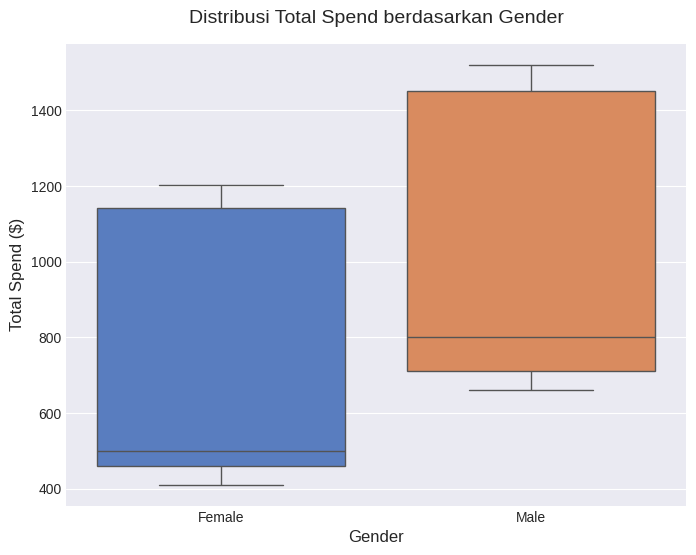

In [ ]:
# Visualisasi boxplot Total Spend berdasarkan Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total Spend', data=df, palette='muted')
plt.title('Distribusi Total Spend berdasarkan Gender', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('total_spend_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

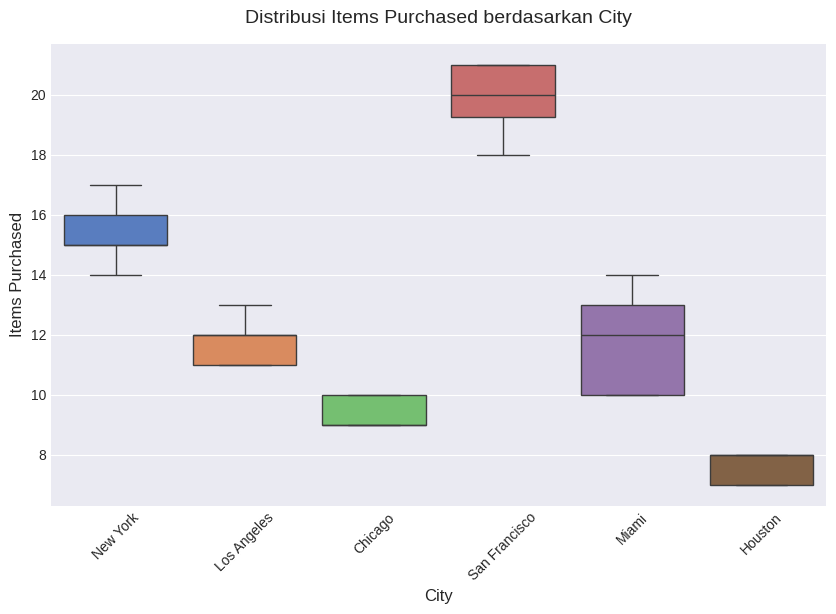

In [ ]:
#Visualisasi boxplot Items Purchased berdasarkan City
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Items Purchased', data=df, palette='muted')
plt.title('Distribusi Items Purchased berdasarkan City', fontsize=14, pad=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Items Purchased', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('items_purchased_by_city.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-53-1965337475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction Level', y='Average Rating', data=df,


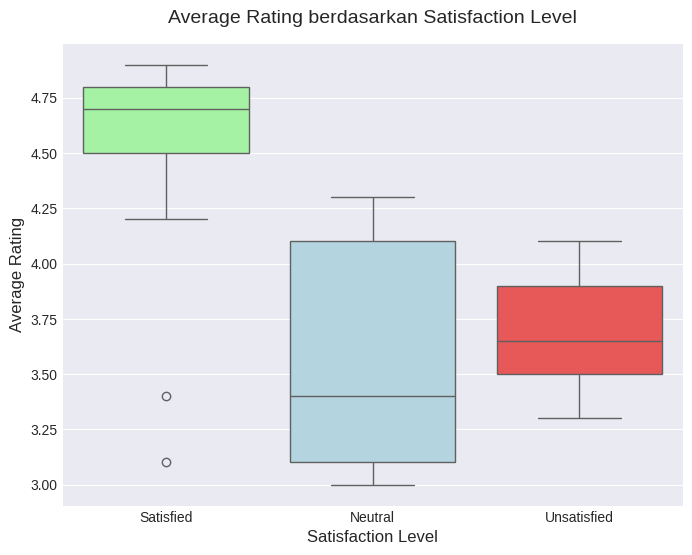

Statistik Average Rating berdasarkan Satisfaction Level:
                    count      mean       std  min  25%   50%  75%  max
Satisfaction Level                                                     
Neutral             107.0  3.655140  0.507720  3.0  3.1  3.40  4.1  4.3
Satisfied           127.0  4.624409  0.262381  3.1  4.5  4.70  4.8  4.9
Unsatisfied         116.0  3.692241  0.272237  3.3  3.5  3.65  3.9  4.1


In [ ]:
# Visualisasi boxplot Average Rating berdasarkan Satisfaction Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction Level', y='Average Rating', data=df,
            palette={'Satisfied': '#98ff98', 'Neutral': '#add8e6', 'Unsatisfied': '#ff4040'},
            order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Average Rating berdasarkan Satisfaction Level', fontsize=14, pad=15)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('average_rating_by_satisfaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistik deskriptif
print("Statistik Average Rating berdasarkan Satisfaction Level:")
print(df.groupby('Satisfaction Level')['Average Rating'].describe())

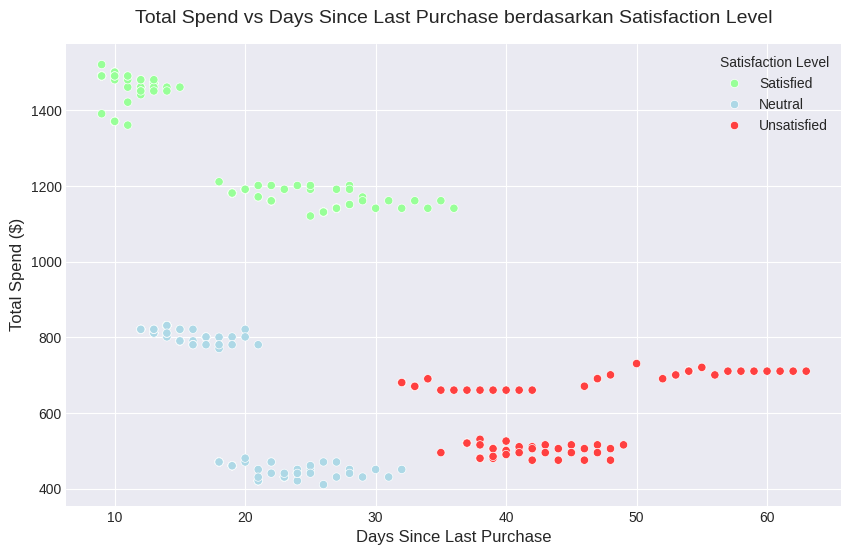

Korelasi antara Total Spend dan Days Since Last Purchase:
-0.5400890652950373


In [ ]:
# Visualisasi scatter plot Total Spend vs Days Since Last Purchase
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days Since Last Purchase', y='Total Spend', data=df, hue='Satisfaction Level',
                palette={'Satisfied': '#98ff98', 'Neutral': '#add8e6', 'Unsatisfied': '#ff4040'})
plt.title('Total Spend vs Days Since Last Purchase berdasarkan Satisfaction Level', fontsize=14, pad=15)
plt.xlabel('Days Since Last Purchase', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('total_spend_vs_days_by_satisfaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Korelasi
print("Korelasi antara Total Spend dan Days Since Last Purchase:")
print(df['Total Spend'].corr(df['Days Since Last Purchase']))